# ***Credit Card Customers***

<center>
<img src = "https://www.freewebheaders.com/wp-content/gallery/office-finance/finances-and-business-graphs-and-charts-web-header.jpg"
height =>
</center>
<right><font size="1"><i> Source: https://www.freewebheaders.com</i></font></right>

<strong>CS 624 - Data Analytics & Big Data</strong>

AJ Broderick *(UIN 01244170)* \
abrod006@odu.edu \

Jasmine Nees *(UIN 01223861)* \
jking044@odu.edu \


## Process Overview

  <center>
    <img src = "https://drive.google.com/uc?export=view&id=1KWLacGHjg4bgMQj0QNYMY0YppzgJ7XMi"
  </center>


## Part 1: Data Exploration & Model Building

In [ ]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import psutil as psu
import os
from sklearn.preprocessing import OneHotEncoder as ohe
from sklearn.preprocessing import StandardScaler as ss
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.metrics import classification_report as cr
from sklearn.preprocessing import LabelEncoder as le
from sklearn import tree
from sklearn.tree import plot_tree
#model = tree.DecisionTreeClassifier()

### <strong><font color= "064F7F" >Data Loading</font> </strong>

In [ ]:
#this segment is needed to connect to GoogleDrive where downloaded data is located
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = DataFrame(pd.read_csv("/content/drive/MyDrive/CS 624/BankChurners.csv"))

#Dropping last two columns from the dataframe. It was recommended by the creator of the Kaggle data, as it was included from their original analysis of the data
df = df.drop(columns=[
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
    ])


In [ ]:
pd.set_option('display.max_columns', None)
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
mem = psu.virtual_memory()

available_memory = mem.available # in bytes

file_size = os.path.getsize("/content/drive/MyDrive/CS 624/BankChurners.csv") # in bytes

if (available_memory > file_size):
  print(f"Dataset fits into memory.\n\nAvailable Memory: {available_memory:,}\nFile Size: {file_size:,}")
else:
  print("Dataset does not fit into memory and sampling is required.")

Dataset fits into memory.

Available Memory: 12,313,952,256
File Size: 1,510,880


### <strong><font color= "#064F7F" >Initial Data Analysis</font> </strong>

In [ ]:
print("Dimensions of the dataset:\n\nRows: ", df.shape[0], "\nColumns: ", df.shape[1])

Dimensions of the dataset:

Rows:  10127 
Columns:  21


In [ ]:
df.info() # No missing/null data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

Based on the columns available in the dataset, we can see that the data is multivariate tabular. The various features and multiple attributes suggest this. The dataset also do not include temporal data.

In [ ]:
df.describe() # summary statistics

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [ ]:
print("Class distribution of 'Attrition_Flag':")
print(df['Attrition_Flag'].value_counts())
print(df['Attrition_Flag'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

Class distribution of 'Attrition_Flag':
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
Existing Customer    83.9%
Attrited Customer    16.1%
Name: Attrition_Flag, dtype: object


Based on the above, it is clear that there is class imbalance. Existing Customer has signicantly more occurrences in the dataset than compared to Attrited Customer. To account for this class imbalance, we will need to do more work during model training.


### <strong><font color= "307863" >Feature Engineering</font> </strong>
One of the first things that was done with the dataset was take the existing data and create some new columns to assist with the analysis and future model creation. Three different methods were used acheive the feature engineering:


1.   Utilize existing columns to calculate a new colums
2.   Create binary 0/1 columns from existing columns to use in models
3.   Create new column that bins data from column, then use bins in conjunction with LabelEncoder for model use



In [ ]:
#Creating an average dollar per transaction to see if that yields anything
df['Avg_Amt_per_Trans'] = df['Total_Trans_Amt'] / df['Total_Trans_Ct']

#Creating a 0/1 binary flags
df['Result'] = df['Attrition_Flag'].apply(lambda x: 0 if x == 'Existing Customer' else 1)
df['Cust_4050_flg'] = df['Customer_Age'].apply(lambda x: 0 if x <40 or x > 50 else 1)

#Creation of a binned data that will make a decision tree easier
df['Total_Trans_Group'] = pd.cut(df['Total_Trans_Amt'], bins=[0, 5000, 10000, 15000, 20000], labels=['<5000', '5000-10000', '10000-15000', '15000-20000'])
df['Trans_Count_Group'] = pd.cut(df['Total_Trans_Ct'], bins=[0, 25, 50, 75, 100, 150], labels=['0-25', '26-50', '51-75', '76-100', '100+'])
df['Amt_Delta_Group'] = pd.cut(df['Total_Amt_Chng_Q4_Q1'], bins=[0, 0.25, 0.5, 0.75, 1.0, 3], labels=['0-25%', '25-50%', '50-75%', '75-100%', '100+%'])

In [ ]:
label_need = ['Education_Level','Marital_Status','Income_Category','Total_Trans_Group','Trans_Count_Group','Amt_Delta_Group']

for column in label_need:
  encoder = le()
  column_name = "le_"+column
  df[column_name] = encoder.fit_transform(df[column])

In [ ]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Avg_Amt_per_Trans,Result,Cust_4050_flg,Total_Trans_Group,Trans_Count_Group,Amt_Delta_Group,le_Education_Level,le_Marital_Status,le_Income_Category,le_Total_Trans_Group,le_Trans_Count_Group,le_Amt_Delta_Group
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,27.238095,0,1,<5000,26-50,100+%,3,1,2,3,2,1
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,39.121212,0,1,<5000,26-50,100+%,2,2,4,3,2,1
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,94.350000,0,0,<5000,0-25,100+%,2,1,3,3,0,1
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,58.550000,0,1,<5000,0-25,100+%,3,3,4,3,0,1
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,29.142857,0,1,<5000,26-50,100+%,5,1,2,3,2,1


### <strong><font color= "307863" >Data Cleaning</font> </strong>

From Assignment 1, the categorical columns had data that was skewed or missing data with 'Unknown' values. To ensure a cleaner model later in the process, the categorical columns will be cleaned first.

In [ ]:
#From Assignment 1, saw that there was a large imbalance towards the Blue card, model will only focus on that card
df = df[df['Card_Category'] == 'Blue']

#Also from Assignment 1, was a number of records with 'Unknown', model will only focus on records where all data is known
cat_colums = ['Income_Category','Marital_Status','Education_Level']
for column in cat_colums:
    condition =  df[column] == 'Unknown'
    df = df[~condition]

A set of boxplots were then created to look at selected quantitative columns to see if any outliers existied and make decision of whether or not they needed to be removed

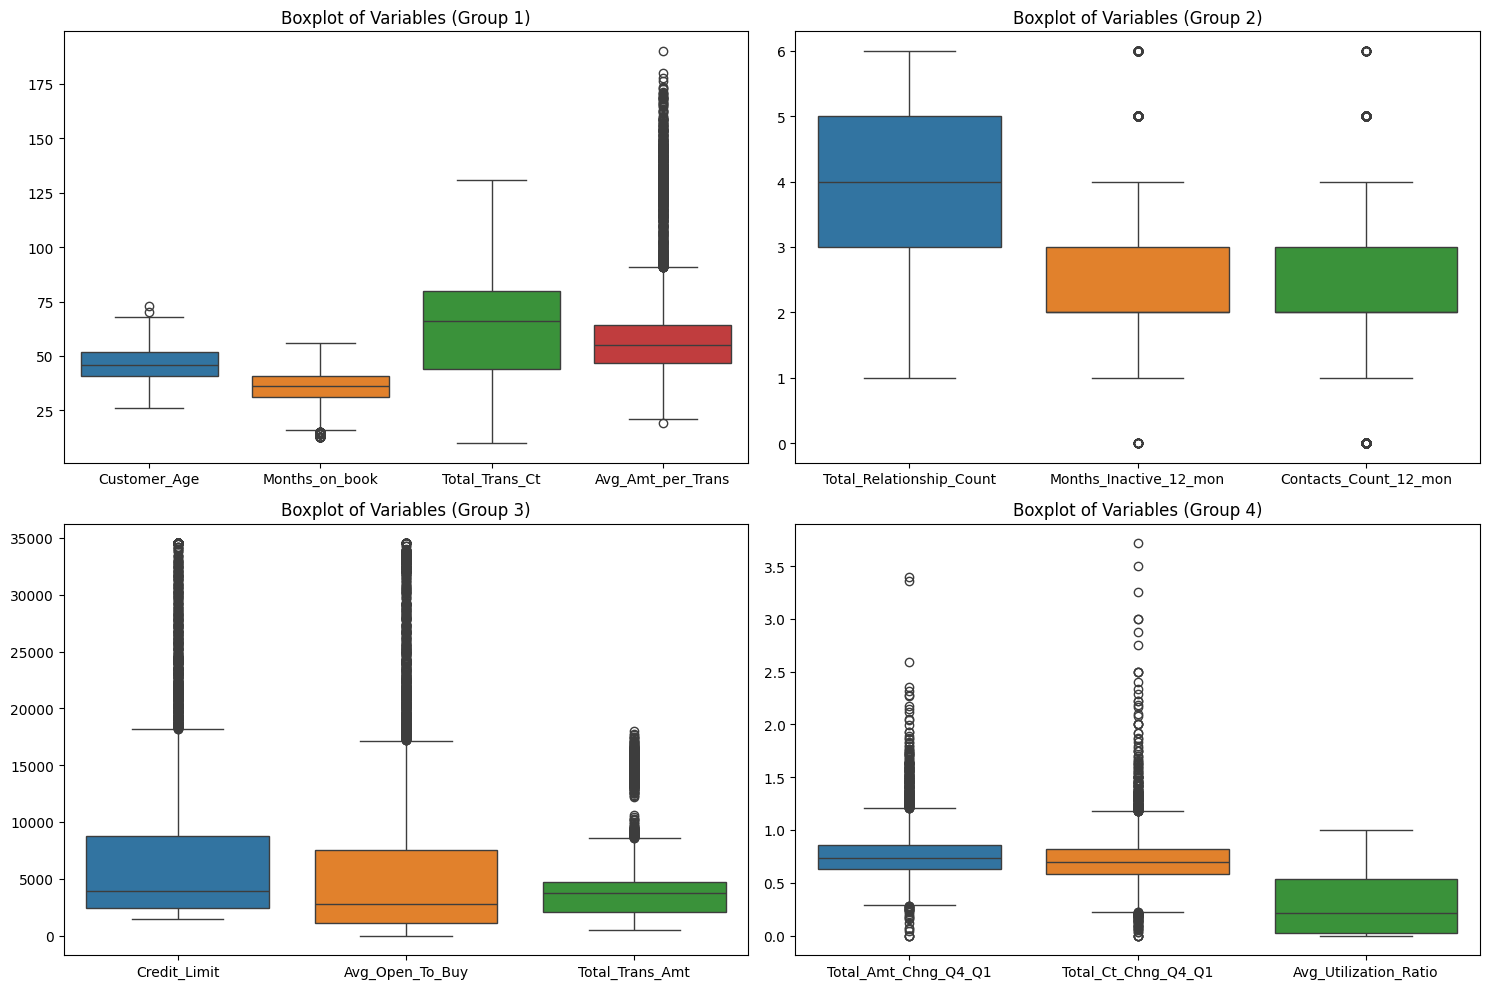

In [ ]:
noID = df.drop(columns=['CLIENTNUM'])

plt.figure(figsize=(15, 10))

selected1 = ['Customer_Age', 'Months_on_book', 'Total_Trans_Ct', 'Avg_Amt_per_Trans']
plt.subplot(2, 2, 1)
sns.boxplot(data=noID[selected1])
plt.title('Boxplot of Variables (Group 1)')

selected2 = ['Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon']

plt.subplot(2, 2, 2)
sns.boxplot(data=noID[selected2])
plt.title('Boxplot of Variables (Group 2)')

selected3 = ['Credit_Limit', 'Avg_Open_To_Buy','Total_Trans_Amt']
plt.subplot(2, 2, 3)
sns.boxplot(data=noID[selected3])
plt.title('Boxplot of Variables (Group 3)')

selected4 = ['Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']
plt.subplot(2, 2, 4)
sns.boxplot(data=noID[selected4])
plt.title('Boxplot of Variables (Group 4)')

plt.tight_layout()

From the charts above, there are a good amount of outliers across many of the selected columns. This led to the decision to remove them from the data.

In [ ]:
features_to_check = [
    'Months_on_book', 'Avg_Amt_per_Trans',
    'Months_Inactive_12_mon',
    'Credit_Limit','Total_Trans_Amt','Avg_Open_To_Buy',
    'Total_Amt_Chng_Q4_Q1','Total_Ct_Chng_Q4_Q1'
 ]
outliers_removed = 0

for feature in features_to_check:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    condition = (df[feature] < lower_bound) | (df[feature] > upper_bound)
    outliers_count = df[condition].shape[0]
    outliers_removed += outliers_count

    # Remove outliers
    df = df[~condition]

print(f"Removed a total of {outliers_removed} outliers across selected features.")

Removed a total of 2174 outliers across selected features.


In [ ]:
print("Class distribution of 'Attrition_Flag':")
print(df['Attrition_Flag'].value_counts())
print(df['Attrition_Flag'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

Class distribution of 'Attrition_Flag':
Existing Customer    3730
Attrited Customer     694
Name: Attrition_Flag, dtype: int64
Existing Customer    84.3%
Attrited Customer    15.7%
Name: Attrition_Flag, dtype: object


With the data cleaned, there is still a class imbalance. However it can be noted that the cleansing did not skew the imbalance in either direction. Given the dataset, it seemed like it would be too difficult to try to levelset the imbalance with SMOTE.

### <strong><font color= "9264AA" >Data Visualization</font> </strong>

A handful of visuals was created to highlight the class imbalance previously discussed. The first being a simple bar chart showing the record count for the Attrition Flag, followed by showing the class imbalance carries across other categorical columns.

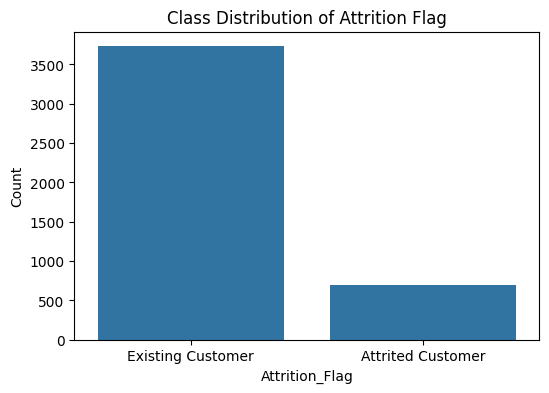

In [ ]:
#Visualization of class imbalance
plt.figure(figsize=(6, 4))

sns.countplot(data=df, x='Attrition_Flag')
plt.title('Class Distribution of Attrition Flag')
plt.xlabel('Attrition_Flag')
plt.ylabel('Count');

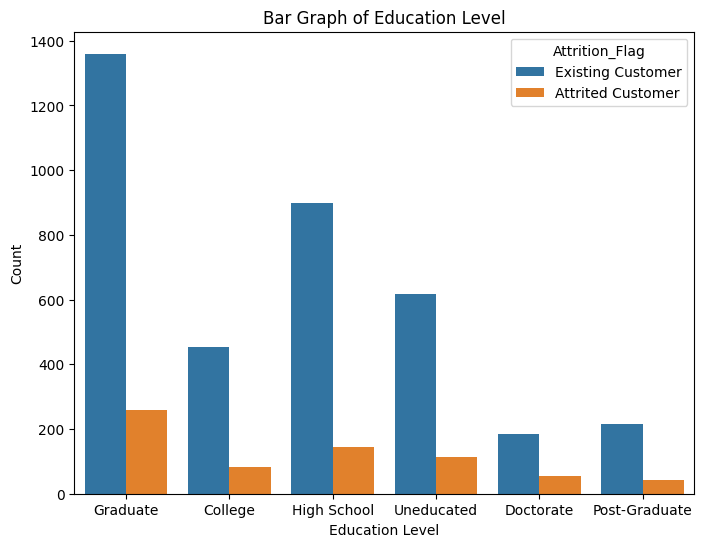

In [ ]:
plt.figure(figsize=(8, 6))

sns.countplot(data=df, x='Education_Level', hue='Attrition_Flag')
plt.title('Bar Graph of Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count');

Another visual created was the same set of boxplots from before, to investigate the impact of the removal of the outliers

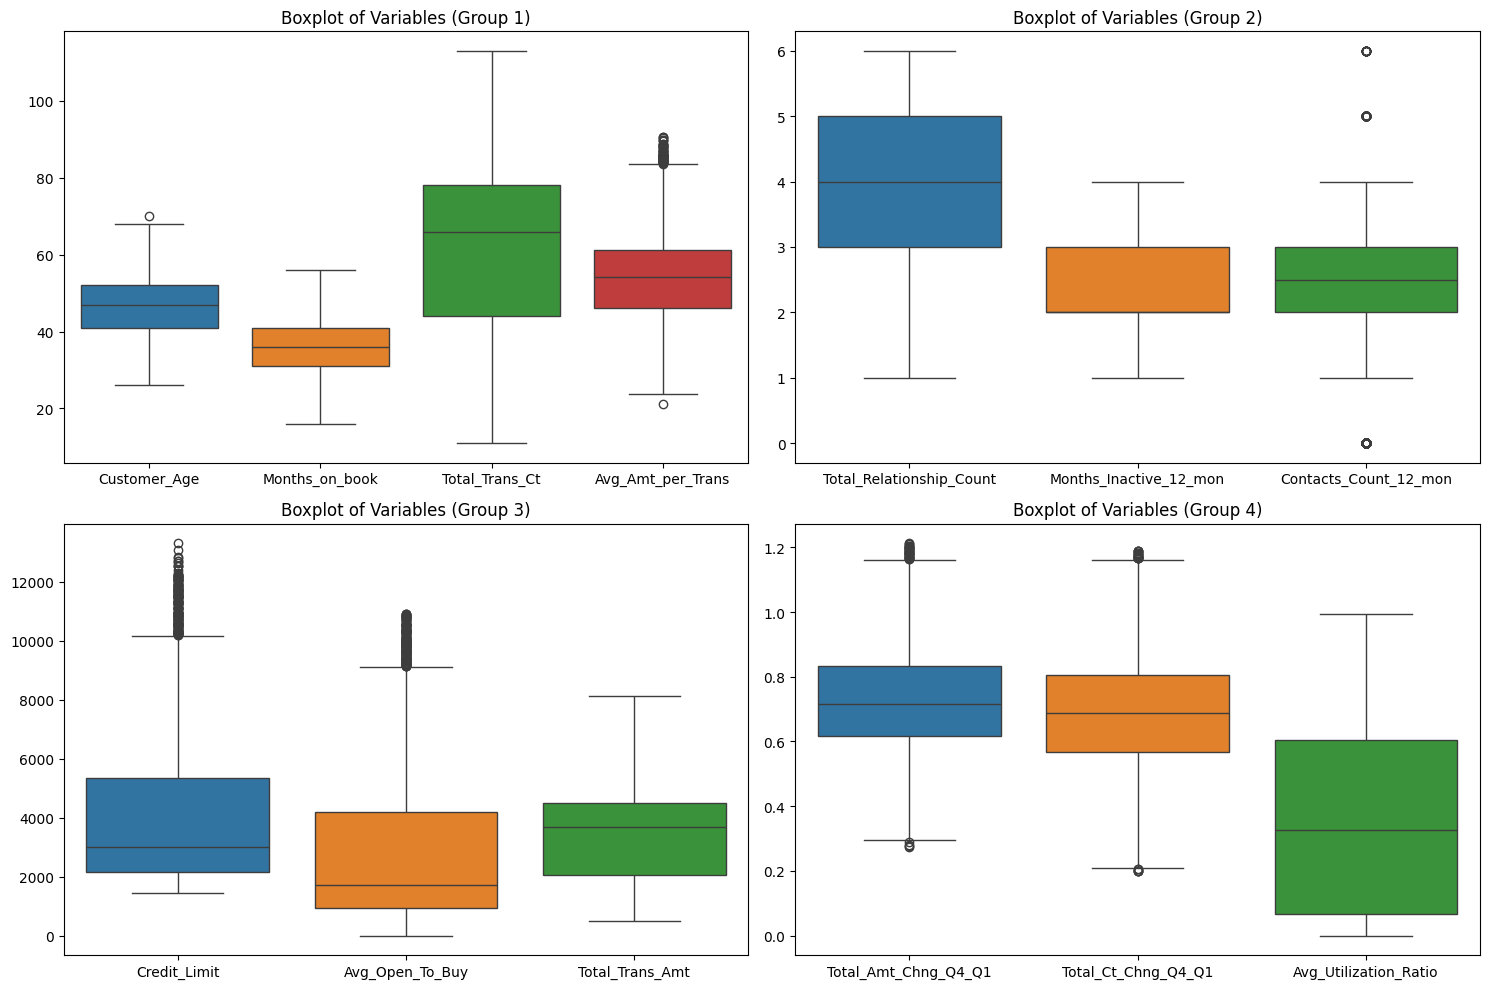

In [ ]:
noID = df.drop(columns=['CLIENTNUM'])

plt.figure(figsize=(15, 10))

selected1 = ['Customer_Age', 'Months_on_book', 'Total_Trans_Ct', 'Avg_Amt_per_Trans']
plt.subplot(2, 2, 1)
sns.boxplot(data=noID[selected1])
plt.title('Boxplot of Variables (Group 1)')

selected2 = ['Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon']
plt.subplot(2, 2, 2)
sns.boxplot(data=noID[selected2])
plt.title('Boxplot of Variables (Group 2)')

selected3 = ['Credit_Limit', 'Avg_Open_To_Buy','Total_Trans_Amt']
plt.subplot(2, 2, 3)
sns.boxplot(data=noID[selected3])
plt.title('Boxplot of Variables (Group 3)')

selected4 = ['Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']
plt.subplot(2, 2, 4)
sns.boxplot(data=noID[selected4])
plt.title('Boxplot of Variables (Group 4)')

plt.tight_layout()

From here correlation matrix was created to try to identify values that have interactions with each other and decide on which one(s) to use in the model(s)

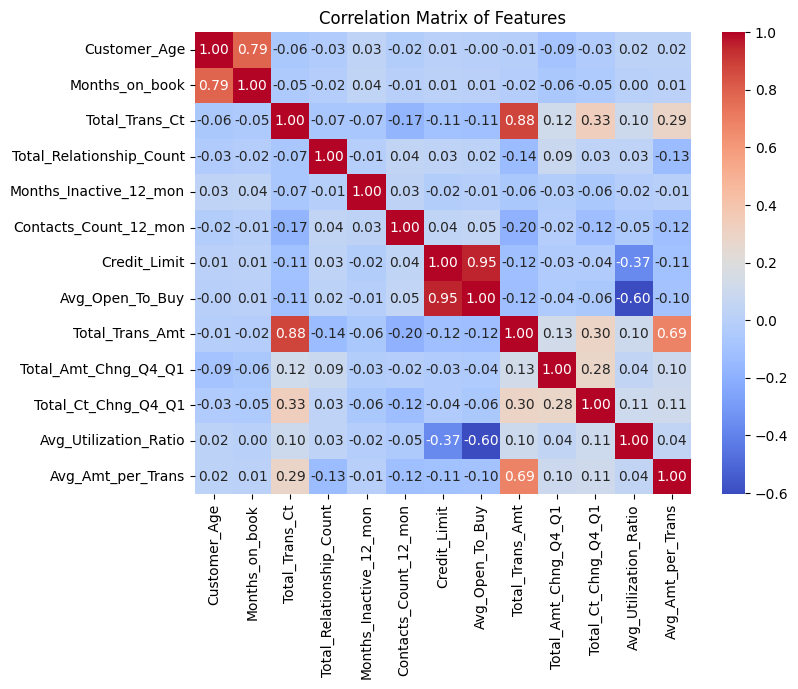

In [ ]:
# Correlation matrix
plt.figure(figsize=(8, 6))
quant_df = df.select_dtypes(include=np.number) # looking only at quantitative columns
quant_df = quant_df[['Customer_Age', 'Months_on_book', 'Total_Trans_Ct','Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon',
                    'Credit_Limit', 'Avg_Open_To_Buy','Total_Trans_Amt','Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio', 'Avg_Amt_per_Trans']]
correlation_matrix = quant_df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

From the correlation matrix, a pairplot to see any obvious correlation with the attrition flag

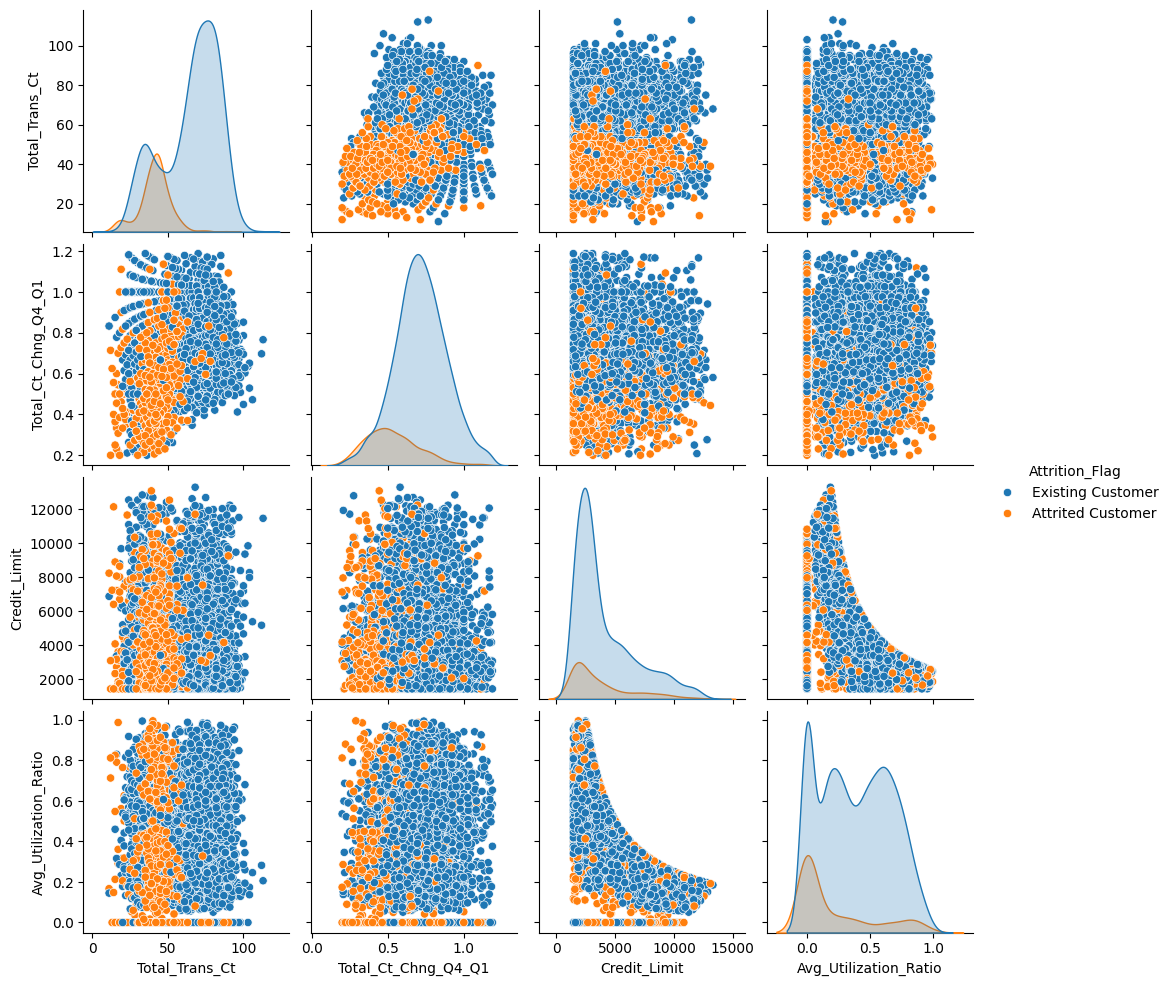

In [ ]:
pp = df[['Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Credit_Limit','Avg_Utilization_Ratio','Attrition_Flag']]
sns.pairplot(pp, hue='Attrition_Flag')

As discussed in Assignment 1, the largest group of customers that exist in the dataset, are customers between the age of 40-50. A histogram was created to redemonstrate.

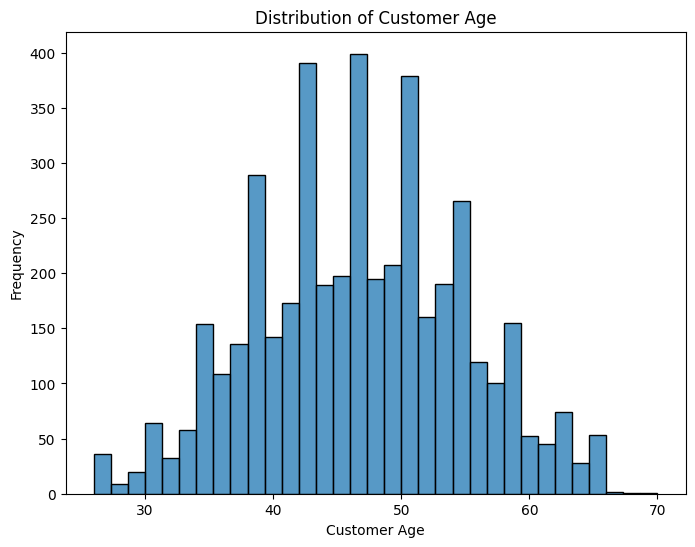

In [ ]:
plt.figure(figsize=(8, 6))

sns.histplot(data=df, x='Customer_Age')

plt.title('Distribution of Customer Age')
plt.xlabel('Customer Age')
plt.ylabel('Frequency');

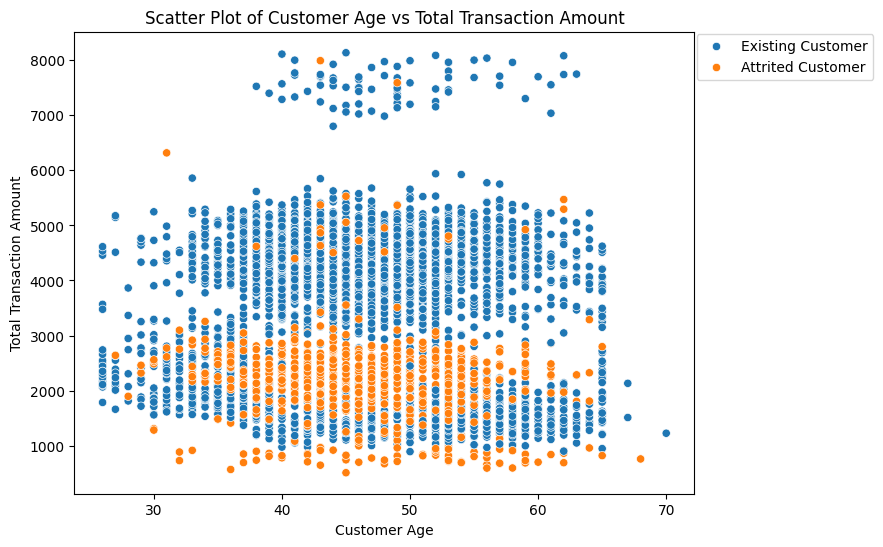

In [ ]:
plt.figure(figsize=(8, 6))

sns.scatterplot(data=df, x='Customer_Age', y='Total_Trans_Amt', hue='Attrition_Flag')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.01))
plt.title('Scatter Plot of Customer Age vs Total Transaction Amount')
plt.xlabel('Customer Age')
plt.ylabel('Total Transaction Amount');

## <strong><font color= "126C8F" >Part 2: Algorithm Details and Optimization</font> </strong>


### <strong><font color= "1BA2D6" >Random Forest</font> </strong>

Since the dataset has a mix of categorical and numerical features as well as having the existence of class imbalance, Random Forest was determined to be a good method since it can handle both well.

#### <strong><font color= "1BA2D6" >Training</font> </strong>

In [ ]:
x = df.drop(columns=['Attrition_Flag', 'Result']) # removing flag and binary flag for attrition
y = df['Attrition_Flag']

encoder = ohe(sparse=False, drop='first') # first is dropped to prevent multicollinearilty
X_encoded = encoder.fit_transform(x)

x_train, x_test, y_train, y_test = tts(X_encoded, y, test_size=0.2, random_state=42) # train dataset
classifer = rfc(class_weight='balanced', random_state=42)
classifer.fit(x_train, y_train)
y_prediction = classifer.predict(x_test)

impFeatures = classifer.feature_importances_ # identify feature importance
impDF = pd.DataFrame({'Feature': encoder.get_feature_names_out(x.columns), 'Importance': impFeatures}).sort_values(by='Importance', ascending=False)

impDF.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Feature,Importance
21305,Trans_Count_Group_26-50,0.052195
21326,le_Trans_Count_Group_4,0.043309
21307,Trans_Count_Group_76-100,0.041957
21324,le_Trans_Count_Group_2,0.038288
21306,Trans_Count_Group_51-75,0.018811


#### <strong><font color= "1BA2D6" >Performance Evaluation</font> </strong>

In [ ]:
print(cr(y_test, y_prediction))

                   precision    recall  f1-score   support

Attrited Customer       0.67      0.45      0.54       118
Existing Customer       0.92      0.97      0.94       767

         accuracy                           0.90       885
        macro avg       0.80      0.71      0.74       885
     weighted avg       0.89      0.90      0.89       885



According to the classification report above, we can see that there is a fairly high accuracy in prediction overall with 90%. If we look closer, we can identify that predicting the Attrited Customer has a good accuracy. The F1-score shows that for the Attrited Customer flag, the harmonic mean is 54%. Since the Attrited Customer class accuracy is fair, but not great, more work can be done to improve the performance of the classifier in accurately identifying attrited customers, but the model performs moderately in predicting the outcome.

---

### <strong><font color= "1BA2D6" >Decision Tree</font> </strong>
Given that the dataset has many categorical & quantitative columns, a Decision Tree was determined to be a good model to train. Also with the plan to predict atrrition, having a simple Y/N output helps with reading a Decision Tree.

#### <strong><font color= "1BA2D6" >Training</font> </strong>

To keep things simple for the beginning of developing the decision tree, only two columns were selected as the inputs for model. These columns were the binary 0/1 flag for determining if the customer was between the age of 40-50, and an encoded transaction count column created in the feature engineering.

In [ ]:
dc_inputs = df[['Cust_4050_flg','le_Trans_Count_Group']]
dc_output = df['Result']

In [ ]:
x_train, x_test, y_train, y_test = tts(dc_inputs, dc_output, test_size=0.2, random_state=42)
dt = tree.DecisionTreeClassifier(random_state = 42)
dt = dt.fit(x_train, y_train)

#### <strong><font color= "1BA2D6" >Performance Evaluation</font> </strong>

[Text(0.5277777777777778, 0.9, 'le_Trans_Count_Group <= 2.5\ngini = 0.273\nsamples = 3539\nvalue = [2963, 576]\nclass = Stay'),
 Text(0.2777777777777778, 0.7, 'Cust_4050_flg <= 0.5\ngini = 0.485\nsamples = 1192\nvalue = [700, 492]\nclass = Stay'),
 Text(0.1111111111111111, 0.5, 'le_Trans_Count_Group <= 0.5\ngini = 0.418\nsamples = 715\nvalue = [502, 213]\nclass = Stay'),
 Text(0.05555555555555555, 0.3, 'gini = 0.499\nsamples = 76\nvalue = [40, 36]\nclass = Stay'),
 Text(0.16666666666666666, 0.3, 'le_Trans_Count_Group <= 1.5\ngini = 0.401\nsamples = 639\nvalue = [462, 177]\nclass = Stay'),
 Text(0.1111111111111111, 0.1, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = Stay'),
 Text(0.2222222222222222, 0.1, 'gini = 0.402\nsamples = 635\nvalue = [458, 177]\nclass = Stay'),
 Text(0.4444444444444444, 0.5, 'le_Trans_Count_Group <= 1.5\ngini = 0.486\nsamples = 477\nvalue = [198, 279]\nclass = Attrition'),
 Text(0.3888888888888889, 0.3, 'le_Trans_Count_Group <= 0.5\ngini = 0.464\nsamples = 30

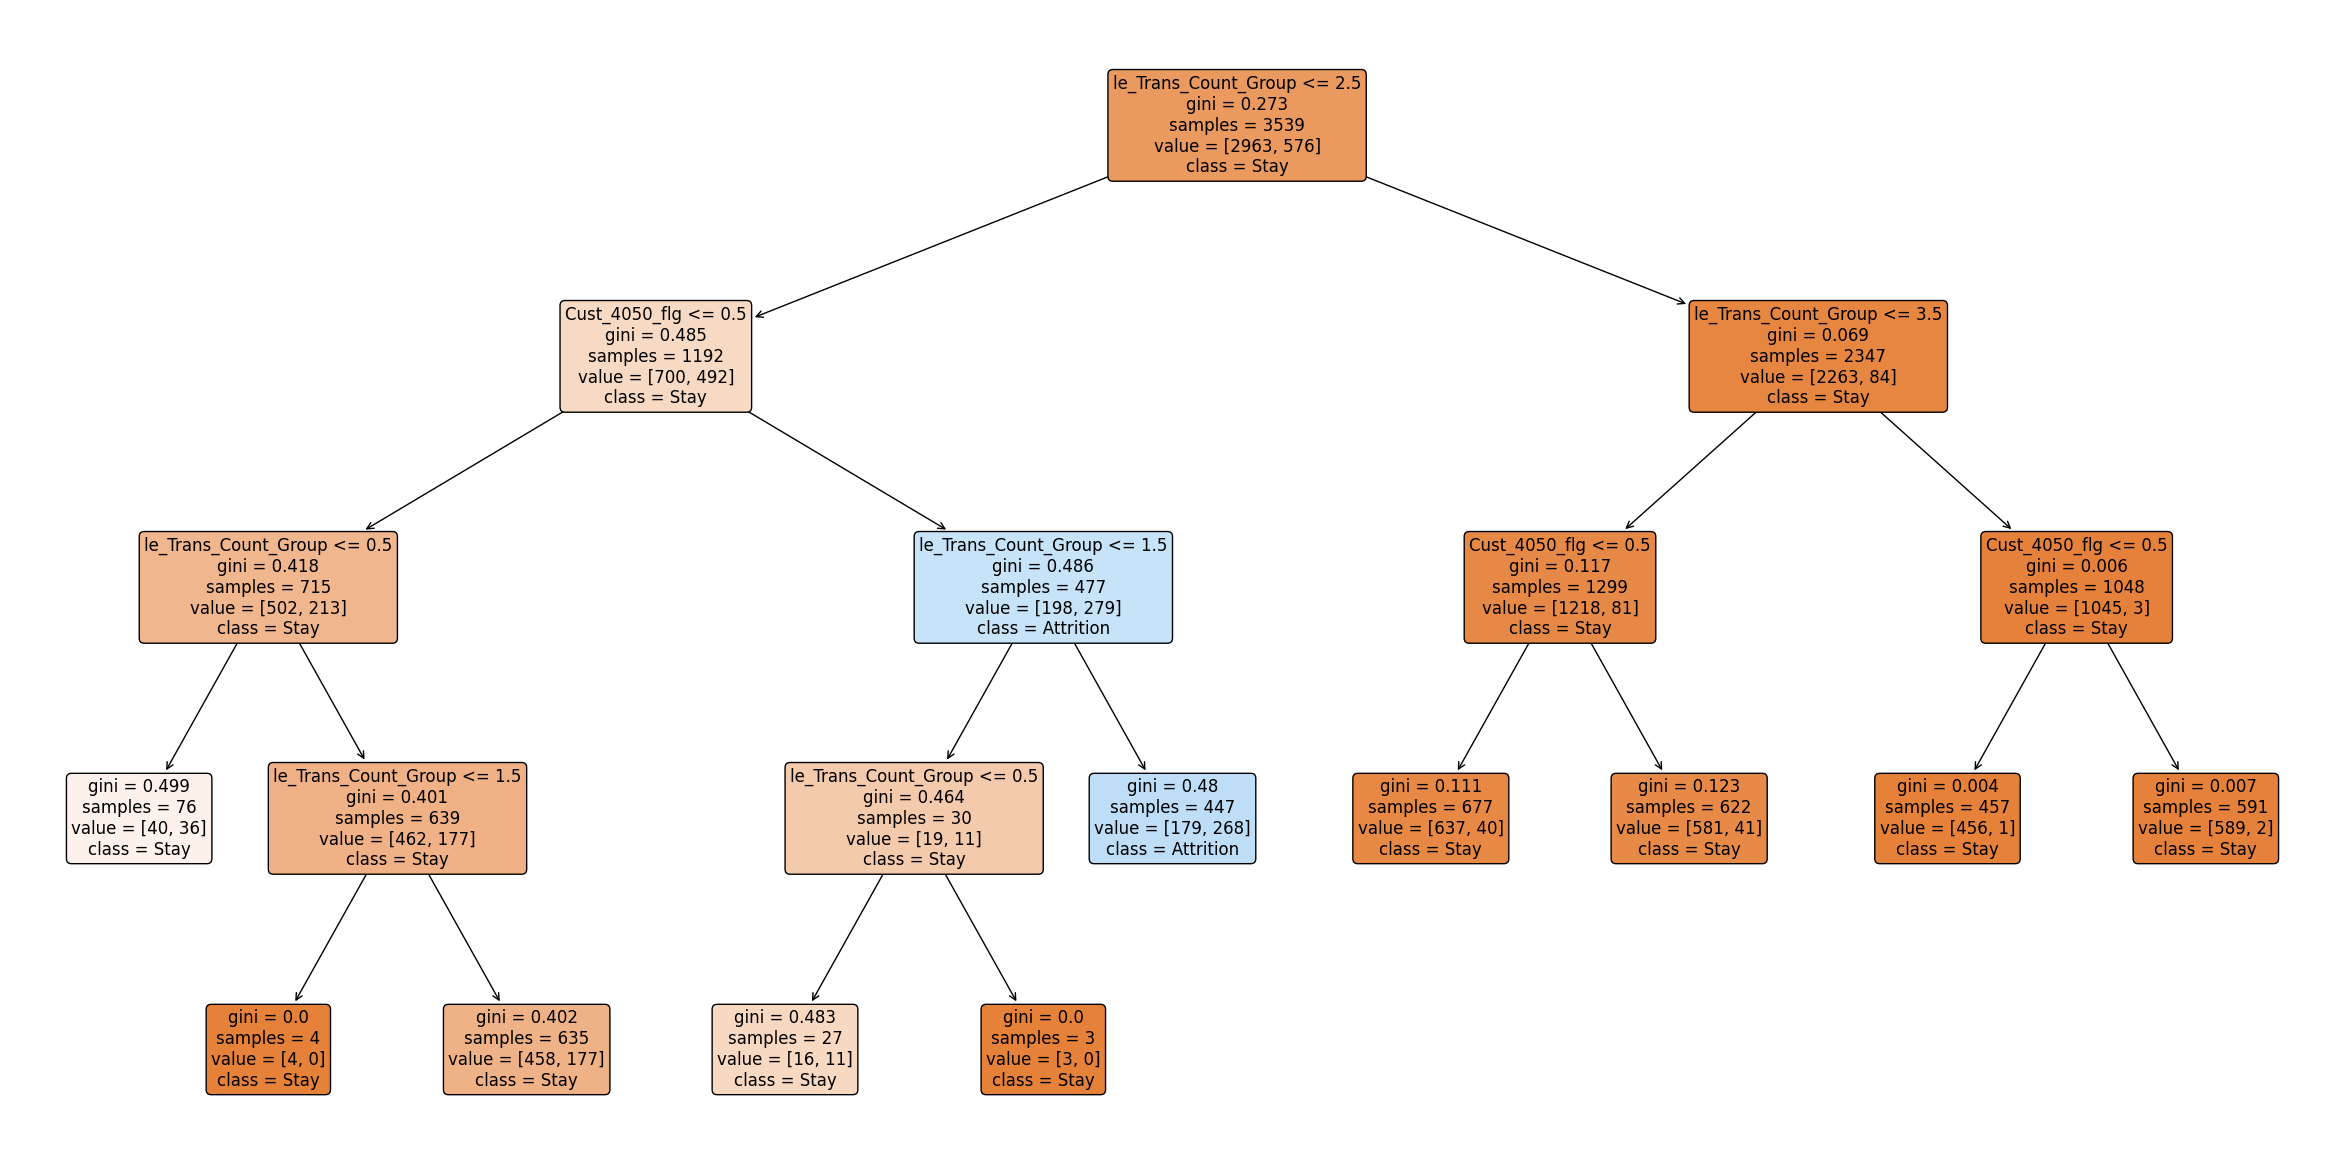

In [ ]:
plt.figure(figsize= (30,15))
plot_tree(dt,
          filled=True,
          rounded=True,
          class_names = ["Stay","Attrition"],
          feature_names=dc_inputs.columns)

In [ ]:
y_pred = dt.predict(x_test)

In [ ]:
print(cr(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       767
           1       0.51      0.42      0.46       118

    accuracy                           0.87       885
   macro avg       0.71      0.68      0.69       885
weighted avg       0.86      0.87      0.86       885



The decision tree model doesn't have as high of precision & recall for the attrited customers as the random forest model *(comparing rates of 51%/42% to the 100%/81%)*. However, the model isn't horribly bad with an overall accuracy of prediction of 87%. This achieved with only two inputs into the model, and there are plenty more to chose from to increase the effectiveness of the model.


### Conclusion

*   **Random Forest** \
Additional feature engineering could be done to add or improve features for more meaningful analysis in prediction. Certain features could also be removed to prevent redunancy and limit irrelevancy.

*   **Decision Tree** \
Go back and reevaluate inputs into the model, maybe expand out to more inputs and utilize `max_depth=#` to give a clean and concise model


